In [1]:
import numpy as np 
from tslearn.datasets import UCR_UEA_datasets
from tslearn.svm import TimeSeriesSVC
from tslearn.preprocessing import TimeSeriesScalerMinMax

/home/jacqueline/.local/share/virtualenvs/TSInterpret-x4eqnPOt/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset='BasicMotions'


train_x,train_y, test_x, test_y=UCR_UEA_datasets().load_dataset(dataset)
train_x = TimeSeriesScalerMinMax().fit_transform(train_x)
test_x = TimeSeriesScalerMinMax().fit_transform(test_x)



model = TimeSeriesSVC(kernel="gak", gamma="auto", probability=True)
model.fit(train_x, train_y)
print("Correct classification rate:", model.score(test_x, test_y))


item=test_x[10].reshape(1,test_x.shape[1],test_x.shape[2])
shape=item.shape
y_target= model.predict_proba(item)
pred_y=  model.predict_proba(train_x)

Correct classification rate: 0.925


2023-08-08 14:05:08.336311: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-08 14:05:09.740330: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(6, 100)
(6, 100)


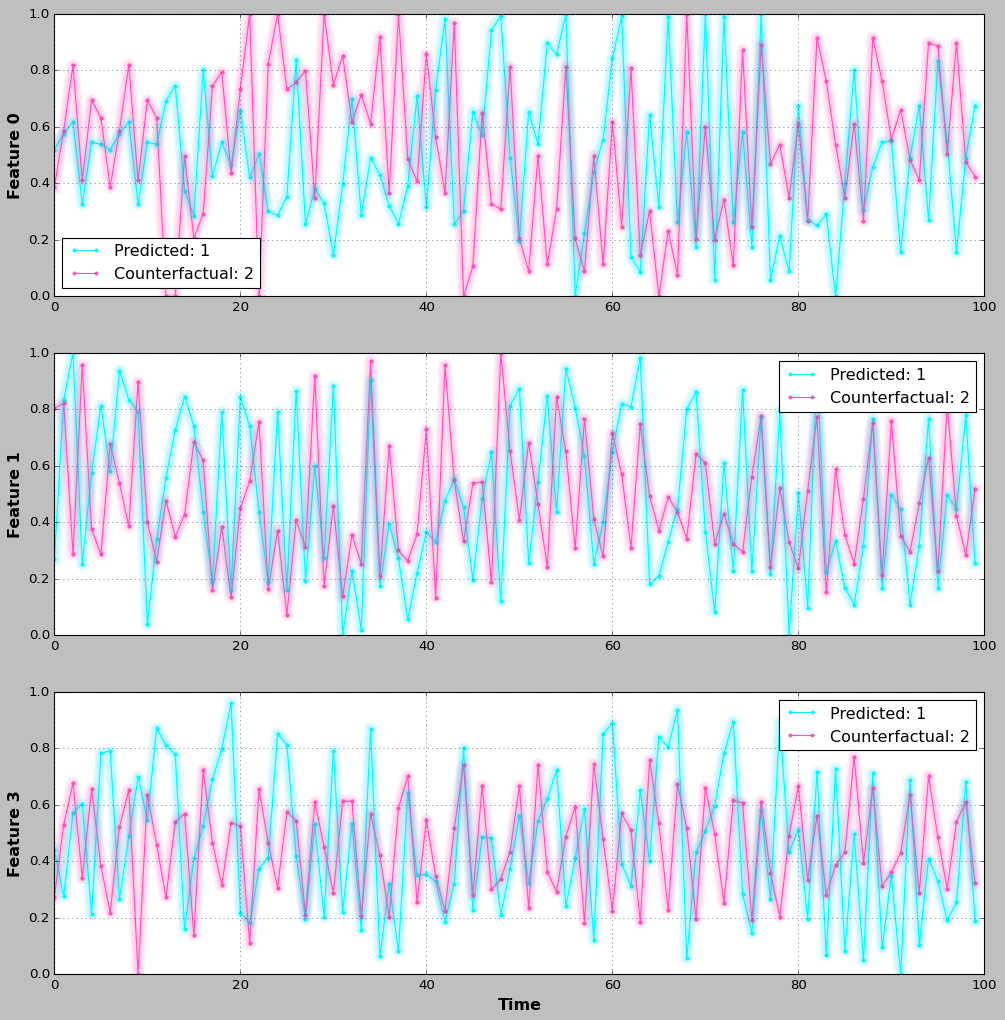

In [3]:
from TSInterpret.InterpretabilityModels.counterfactual.COMTECF import COMTECF
exp_model= COMTECF(model,(train_x,pred_y),mode='time', backend='SK', method= 'opt')
exp = exp_model.explain(item)
array, label=exp


%matplotlib inline
org_label=np.argmax(y_target)
cf_label=label[0]
exp=array

exp_model.plot_in_one(item,org_label,exp,cf_label,figsize=(15,15))